# Random Forest Training
Using predictors platform creator, genre, and publisher

### Imports

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Loading the preprocessed data

In [10]:
data = pd.read_csv('../Data/preprocessed_vgsales.csv')

### Training and testing the random forest

In [11]:
X = pd.get_dummies(data[['Platform_Creator', 'Publisher', 'Genre']])
y = data['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf=RandomForestRegressor(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Calculating performance

In [12]:
#Calculate MSE
mse = mean_squared_error(y_test, y_pred,)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.038242834976265
R-squared: 0.09232716573614252


## Graphing feature importances

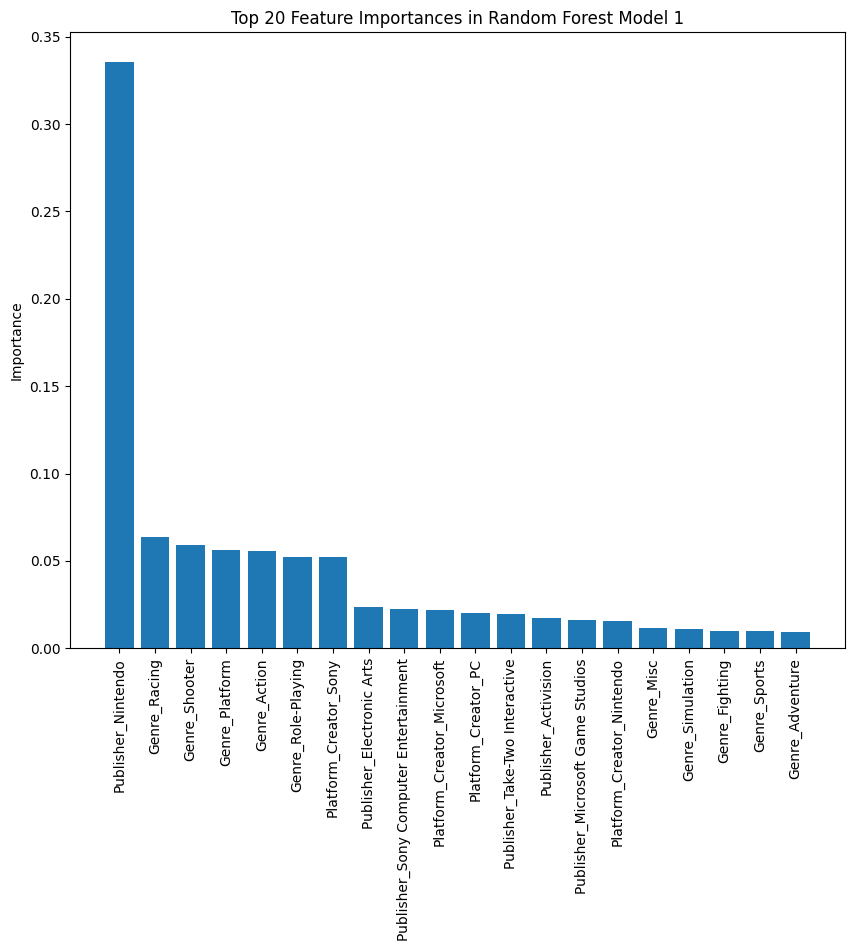

In [13]:
importances = clf.feature_importances_

# Create labels from the feature names
featureLabels = X.columns

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Select the top N features
topFeatures = 20 
topIndices = indices[:topFeatures]

# Create the plot for the top N features
plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances in Random Forest Model 1')
plt.bar(range(topFeatures), importances[topIndices], align='center')
plt.xticks(range(topFeatures), np.array(featureLabels)[topIndices], rotation=90)
plt.ylabel('Importance')
plt.show()